In [1]:
import os
import numpy as np

import torch
from torchvision import transforms
import torchvision
import torch.nn as nn
from PIL import Image
import matplotlib.pyplot as plt
import glob
import random

from gan_utils import StarGAN_generator, Pix2PixGenerator
import image_utils
import search_utils

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
StarGAN = StarGAN_generator('./generators/stargan/')

In [3]:
Pix2Pix = Pix2PixGenerator('./generators/pix2pix_models.pth')

# Load Search Models

In [4]:
dress_imgs_path = './test_images/dresses_sample/'
model_imgs_path = './test_images/models_sample/'

dress_feats_path = './test_features/dresses_sample/'
model_feats_path = './test_features/models_sample/'

In [5]:
dress_rn_search = search_utils.Search(dress_imgs_path, os.path.join(dress_feats_path, 'resnet_orig'))
model_rn_search = search_utils.Search(model_imgs_path, os.path.join(model_feats_path, 'resnet_orig'))

In [6]:
feat_gen_114 = search_utils.AkiwiFeatureGenerator(114)
dress_114_search = search_utils.Search(dress_imgs_path, os.path.join(dress_feats_path, 'akiwi_114'), feat_gen_114)
model_114_search = search_utils.Search(model_imgs_path, os.path.join(model_feats_path, 'akiwi_114'), feat_gen_114)

In [7]:
feat_gen_50 = search_utils.AkiwiFeatureGenerator(50)
dress_50_search = search_utils.Search(dress_imgs_path, os.path.join(dress_feats_path, 'akiwi_50'), feat_gen_50)
model_50_search = search_utils.Search(model_imgs_path, os.path.join(model_feats_path, 'akiwi_50'), feat_gen_50)

# Find Similar Images

In [12]:
def get_stargan_imgs_for_attr(img, attr):
    
    fake_imgs = []
    values = StarGAN.LABELS[attr]
    for idx, v in enumerate(values):
        
        fake_img = StarGAN.generate_image(img, attr, v)
        fake_imgs.append(fake_img)

    return fake_imgs

In [21]:
def plot_img_row(images, img_labels=None):
    fig, axarr = plt.subplots(nrows=1, ncols=len(images), figsize=(len(images)*2, 2))
    
    for i, img in enumerate(images):
        axarr[i].imshow(img)
        axarr[i].set_xticks([])
        axarr[i].set_yticks([])
        
        if img_labels is not None:
            axarr[i].set_title(img_labels[i])
        
    plt.show()

In [26]:
test_img_path = './test_images/dresses_sample/5641460_552693338.jpg'
test_img = Image.open(test_img_path)

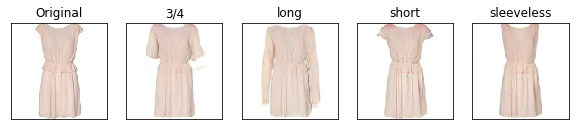

In [27]:
fake_sleeves = get_stargan_imgs_for_attr(test_img, 'sleeve_length')
plot_img_row([test_img] + fake_sleeves, img_labels=['Original'] + StarGAN.LABELS['sleeve_length'])

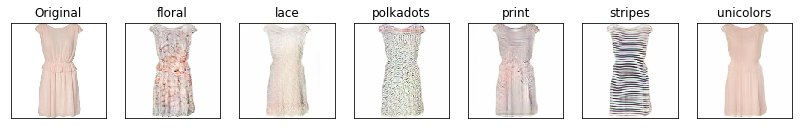

In [28]:
fake_pattern = get_stargan_imgs_for_attr(test_img, 'pattern')
plot_img_row([test_img] + fake_pattern, img_labels=['Original'] + StarGAN.LABELS['pattern'])

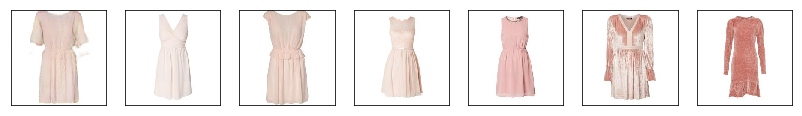

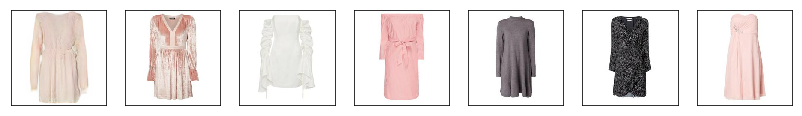

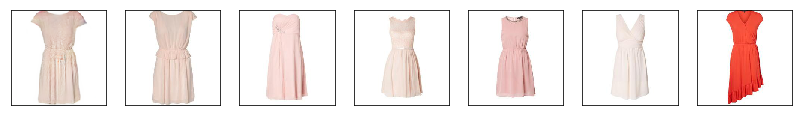

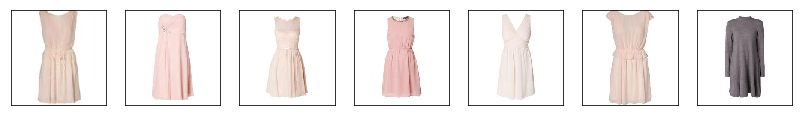

In [29]:
for fake_img in fake_sleeves:
    sim_imgs = dress_rn_search.get_similar_images(fake_img, num_imgs=6)
    sim_imgs = [fake_img] + sim_imgs
    plot_img_row(sim_imgs)

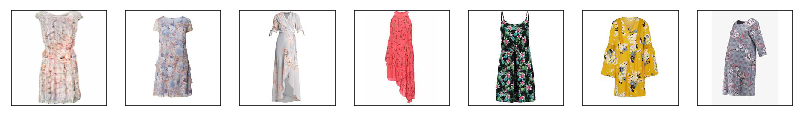

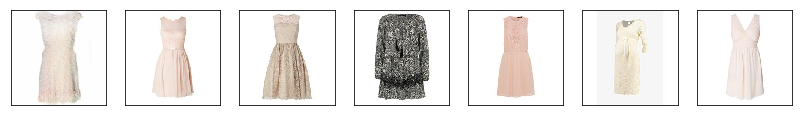

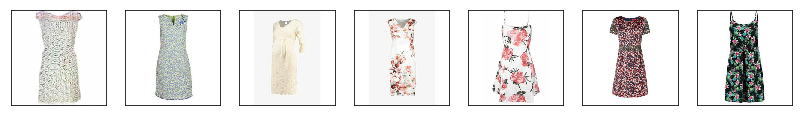

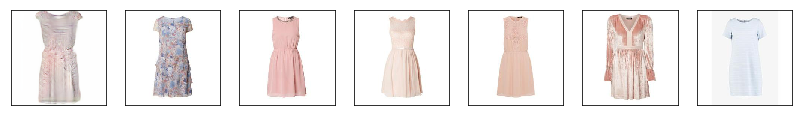

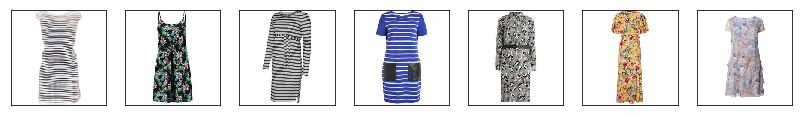

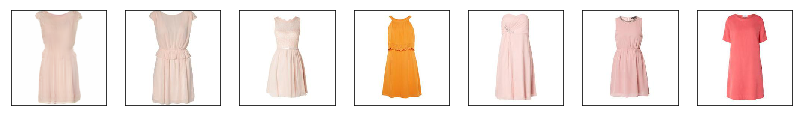

In [31]:
for fake_img in fake_pattern:
    sim_imgs = dress_rn_search.get_similar_images(fake_img, num_imgs=6)
    sim_imgs = [fake_img] + sim_imgs
    plot_img_row(sim_imgs)

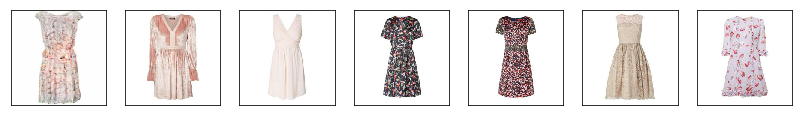

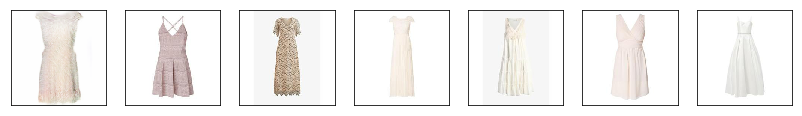

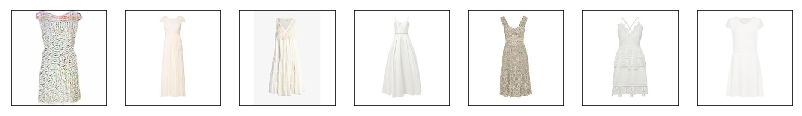

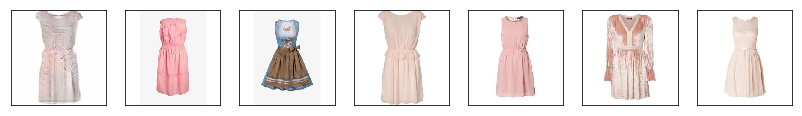

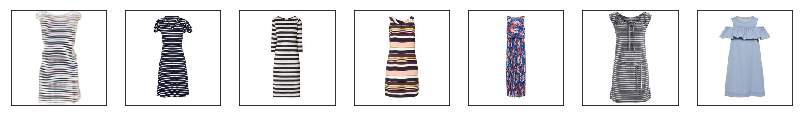

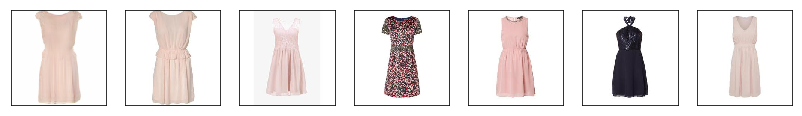

In [35]:
for fake_img in fake_pattern:
    sim_imgs = dress_114_search.get_similar_images(fake_img, num_imgs=6)
    sim_imgs = [fake_img] + sim_imgs
    plot_img_row(sim_imgs)

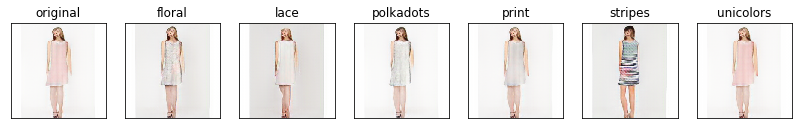

In [38]:
# pix2pix
model_imgs = [Pix2Pix.generate_image(img) for img in [test_img] + fake_pattern]
plot_img_row(model_imgs, img_labels=['original'] + StarGAN.LABELS['pattern'])

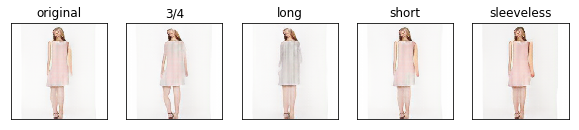

In [41]:
# pix2pix
model_imgs = [Pix2Pix.generate_image(img) for img in [test_img] + fake_sleeves]
plot_img_row(model_imgs, img_labels=['original'] + StarGAN.LABELS['sleeve_length'])

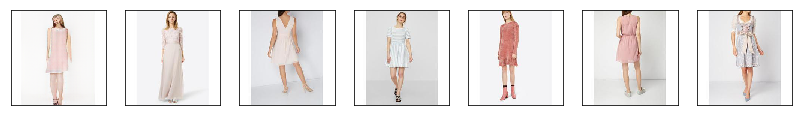

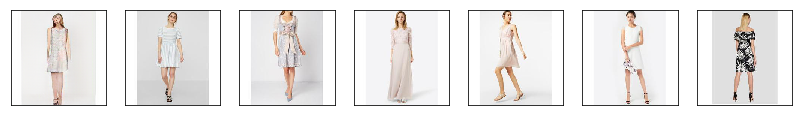

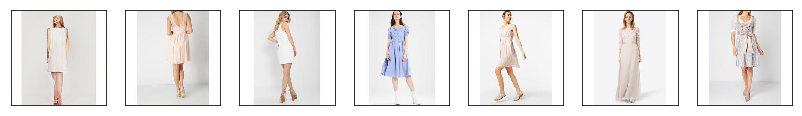

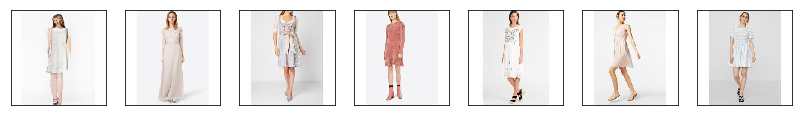

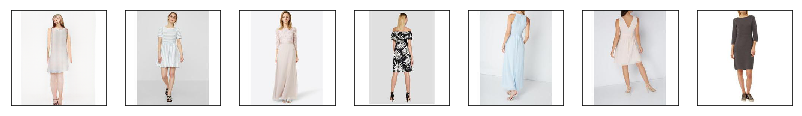

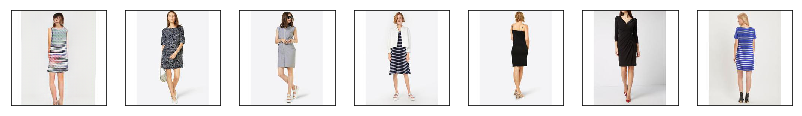

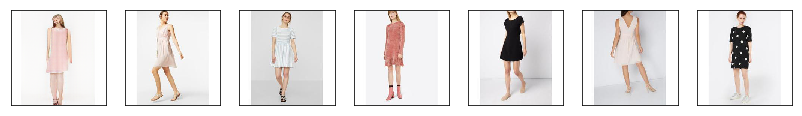

In [40]:
for fake_img in model_imgs:
    sim_imgs = model_rn_search.get_similar_images(fake_img, num_imgs=6)
    sim_imgs = [fake_img] + sim_imgs
    plot_img_row(sim_imgs)